## Metatrader5 Python Library and Connecting Python with MetaTrader

In [1]:
## import the libraries
import MetaTrader5 as mt5
import pandas as pd

In [2]:
## connect with python
mt5.initialize(login = 51381685, server = "ICMarketsSC-Demo", password ="jy1YYMV6")

True

## Placing Buy Limit and Sell Limit Orders with Python

In [3]:
## placing buy limit order
def buy_limit(symbol, volume, price):
    request = mt5.order_send({
        "action": mt5.TRADE_ACTION_PENDING,
        "symbol": symbol,
        "volume": volume,
        "type": mt5.ORDER_TYPE_BUY_LIMIT,
        "price": price,
        "deviation": 20,
        "magic": 100,
        "comment": "python market order",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    })
    
    ## variable to capture the output
    print(request)

## passing the parameters
buy_limit("GBPUSD", 0.02, 1.23700)

OrderSendResult(retcode=10009, deal=0, order=482714120, volume=0.02, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=1758966164, retcode_external=0, request=TradeRequest(action=5, magic=100, order=0, symbol='GBPUSD', volume=0.02, price=1.237, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=2, type_filling=1, type_time=0, expiration=0, comment='python market order', position=0, position_by=0))


In [4]:
## placing sell limit order
def sell_limit(symbol,volume,price):
    request = mt5.order_send({
        "action": mt5.TRADE_ACTION_PENDING,
        "symbol": symbol,
        "volume": volume,
        "type": mt5.ORDER_TYPE_SELL_LIMIT,
        "price": price,
        "deviation": 20,
        "magic": 100,
        "comment": "python market order",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    })
    
    ## variable to capture the output
    print(request)

## passing the parameters
sell_limit("GBPUSD", 0.02, 1.24330)

OrderSendResult(retcode=10009, deal=0, order=482714183, volume=0.02, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=1758966165, retcode_external=0, request=TradeRequest(action=5, magic=100, order=0, symbol='GBPUSD', volume=0.02, price=1.2433, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=3, type_filling=1, type_time=0, expiration=0, comment='python market order', position=0, position_by=0))


## Placing Market Orders

In [5]:
def market_order(symbol, volume, order_type):
    tick = mt5.symbol_info_tick(symbol)
    order_dict = {'buy': 0, 'sell': 1}
    price_dict = {'buy': tick.ask, 'sell': tick.bid}

    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": volume,
        "type": order_dict[order_type],
        "price": price_dict[order_type],
        "deviation": 20,
        "magic": 100,
        "comment": "python market order",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    }

    order_result = mt5.order_send(request)
    print(order_result)
    return order_result

In [6]:
## placing a market order (buy)
market_order("EURUSD", 0.05, "buy")

OrderSendResult(retcode=10009, deal=350374878, order=482715340, volume=0.05, price=1.0664, bid=1.06634, ask=1.0664, comment='Request executed', request_id=1758966168, retcode_external=0, request=TradeRequest(action=1, magic=100, order=0, symbol='EURUSD', volume=0.05, price=1.06645, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=0, type_filling=1, type_time=0, expiration=0, comment='python market order', position=0, position_by=0))


OrderSendResult(retcode=10009, deal=350374878, order=482715340, volume=0.05, price=1.0664, bid=1.06634, ask=1.0664, comment='Request executed', request_id=1758966168, retcode_external=0, request=TradeRequest(action=1, magic=100, order=0, symbol='EURUSD', volume=0.05, price=1.06645, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=0, type_filling=1, type_time=0, expiration=0, comment='python market order', position=0, position_by=0))

In [7]:
## placing a market order (sell)
market_order("EURUSD", 0.05, "sell")

OrderSendResult(retcode=10009, deal=350374894, order=482715357, volume=0.05, price=1.06635, bid=1.06635, ask=1.06642, comment='Request executed', request_id=1758966169, retcode_external=0, request=TradeRequest(action=1, magic=100, order=0, symbol='EURUSD', volume=0.05, price=1.06634, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=1, type_time=0, expiration=0, comment='python market order', position=0, position_by=0))


OrderSendResult(retcode=10009, deal=350374894, order=482715357, volume=0.05, price=1.06635, bid=1.06635, ask=1.06642, comment='Request executed', request_id=1758966169, retcode_external=0, request=TradeRequest(action=1, magic=100, order=0, symbol='EURUSD', volume=0.05, price=1.06634, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=1, type_time=0, expiration=0, comment='python market order', position=0, position_by=0))

## Getting Current Position Details

We have to place some kind of orders in order to run this section.

In [8]:
## get the list of positions on symbols whose names contain "*USD*"
usd_positions = mt5.positions_get(group = "*USD*")
if usd_positions == None:
    print("No positions with group=\"*USD*\", error code={}".format(mt5.last_error()))
elif len(usd_positions) > 0:
    print("positions_get(group=\"*USD*\")={}".format(len(usd_positions)))
    ## display these positions as a table using pandas.DataFrame
    df = pd.DataFrame(list(usd_positions),columns = usd_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit = 's')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
    print(df)

positions_get(group="*USD*")=5
      ticket                time  type  magic  identifier  reason  volume  \
0  482715925 2023-09-18 10:32:37     1      0   482715925       0    0.01   
1  482716018 2023-09-18 10:32:52     1      0   482716018       0    0.02   
2  482716121 2023-09-18 10:33:07     0      0   482716121       0    0.01   
3  482716216 2023-09-18 10:33:26     1      0   482716216       0    0.01   
4  482716247 2023-09-18 10:33:31     0      0   482716247       0    0.01   

   price_open   sl   tp  price_current  swap  profit  symbol comment  
0     1.23904  0.0  0.0        1.23903   0.0    0.01  GBPUSD          
1     1.23894  0.0  0.0        1.23903   0.0   -0.18  GBPUSD          
2     1.23892  0.0  0.0        1.23896   0.0    0.04  GBPUSD          
3     1.06633  0.0  0.0        1.06641   0.0   -0.08  EURUSD          
4     1.06639  0.0  0.0        1.06635   0.0   -0.04  EURUSD          


In [9]:
## for currency pair EUR/USD (individually)
usd_positions = mt5.positions_get(group = "EURUSD")
df = pd.DataFrame(list(usd_positions),columns = usd_positions[0]._asdict().keys())
df['time'] = pd.to_datetime(df['time'], unit = 's')
df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
print(df)

      ticket                time  type  magic  identifier  reason  volume  \
0  482716216 2023-09-18 10:33:26     1      0   482716216       0    0.01   
1  482716247 2023-09-18 10:33:31     0      0   482716247       0    0.01   

   price_open   sl   tp  price_current  swap  profit  symbol comment  
0     1.06633  0.0  0.0        1.06650   0.0   -0.17  EURUSD          
1     1.06639  0.0  0.0        1.06643   0.0    0.04  EURUSD          


In [10]:
## for currency pair GBP/USD (individually)
usd_positions = mt5.positions_get(group = "GBPUSD")
df = pd.DataFrame(list(usd_positions),columns = usd_positions[0]._asdict().keys())
df['time'] = pd.to_datetime(df['time'], unit = 's')
df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
print(df)

      ticket                time  type  magic  identifier  reason  volume  \
0  482715925 2023-09-18 10:32:37     1      0   482715925       0    0.01   
1  482716018 2023-09-18 10:32:52     1      0   482716018       0    0.02   
2  482716121 2023-09-18 10:33:07     0      0   482716121       0    0.01   

   price_open   sl   tp  price_current  swap  profit  symbol comment  
0     1.23904  0.0  0.0        1.23908   0.0   -0.04  GBPUSD          
1     1.23894  0.0  0.0        1.23908   0.0   -0.28  GBPUSD          
2     1.23892  0.0  0.0        1.23902   0.0    0.10  GBPUSD          


## Calculate Total Profit and Volume 

In [11]:
## function to calculate the total profit
def cal_profit(symbol):
    usd_positions = mt5.positions_get(symbol = symbol)
    df = pd.DataFrame(list(usd_positions), columns = usd_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit = 's')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
    profit = float(df["profit"].sum())
    return profit

In [12]:
## let's calculate the profit for GBP/USD
profit = cal_profit("GBPUSD")
print(profit)

-0.27


In [13]:
## let's calculate the profit for EUR/USD
profit = cal_profit("EURUSD")
print(profit)

-0.12


In [14]:
## function to calculate the total volume
def cal_volume(symbol):
    usd_positions = mt5.positions_get(symbol = symbol)
    df = pd.DataFrame(list(usd_positions), columns = usd_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit = 's')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
    volume = float(df["volume"].sum())
    return volume

In [15]:
## let's calculate the total volume for GBP/USD
volume = cal_volume("GBPUSD")
print(volume)

0.04


In [16]:
## let's calculate the total volume for EUR/USD
volume = cal_volume("EURUSD")
print(volume)

0.02


Now let us separate buy or sell order selectively in the type column.

In [17]:
## get order details (buy) for GBP/USD
usd_positions = mt5.positions_get(group = "GBPUSD")
df = pd.DataFrame(list(usd_positions),columns = usd_positions[0]._asdict().keys())
df['time'] = pd.to_datetime(df['time'], unit = 's')
df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
df = df.loc[df.type == 0]
print(df)

      ticket                time  type  magic  identifier  reason  volume  \
2  482716121 2023-09-18 10:33:07     0      0   482716121       0    0.01   

   price_open   sl   tp  price_current  swap  profit  symbol comment  
2     1.23892  0.0  0.0        1.23923   0.0    0.31  GBPUSD          


In [18]:
## get order details (sell) for GBP/USD
usd_positions = mt5.positions_get(group = "GBPUSD")
df = pd.DataFrame(list(usd_positions),columns = usd_positions[0]._asdict().keys())
df['time'] = pd.to_datetime(df['time'], unit = 's')
df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
df = df.loc[df.type == 1]
print(df)

      ticket                time  type  magic  identifier  reason  volume  \
0  482715925 2023-09-18 10:32:37     1      0   482715925       0    0.01   
1  482716018 2023-09-18 10:32:52     1      0   482716018       0    0.02   

   price_open   sl   tp  price_current  swap  profit  symbol comment  
0     1.23904  0.0  0.0        1.23927   0.0   -0.23  GBPUSD          
1     1.23894  0.0  0.0        1.23927   0.0   -0.66  GBPUSD          


In [19]:
## function to calculate the profit for buy position
def cal_buy_profit(symbol):
    usd_positions = mt5.positions_get(symbol = symbol)
    df = pd.DataFrame(list(usd_positions), columns = usd_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit = 's')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
    df = df.loc[df.type == 0]
    profit = float(df["profit"].sum())
    return profit

In [20]:
## function to calculate the profit for sell position
def cal_sell_profit(symbol):
    usd_positions = mt5.positions_get(symbol = symbol)
    df = pd.DataFrame(list(usd_positions), columns = usd_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit = 's')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
    df = df.loc[df.type == 1]
    profit = float(df["profit"].sum())
    return profit

In [21]:
## let's calculate the profit for buy position (GBP/USD)
x = cal_buy_profit("GBPUSD")
print(x)

0.31


In [22]:
## let's calculate the profit for sell position (GBP/USD)
y = cal_sell_profit("GBPUSD")
print(y)

-0.98


## Calculate Margin

In [23]:
## function to calculate the total margin for buy position
def cal_buy_margin(symbol):
    usd_positions = mt5.positions_get(symbol = symbol)
    df = pd.DataFrame(list(usd_positions), columns = usd_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit = 's')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
    df = df.loc[df.type == 0]

    sum = 0
    for i in df.index:
        volume = df.volume[i]
        open_price = df.price_open[i]
        margin = mt5.order_calc_margin(mt5.ORDER_TYPE_BUY, symbol, volume, open_price)
        sum += margin
    return sum

In [24]:
## function to calculate the total margin for sell position
def cal_sell_margin(symbol):
    usd_positions = mt5.positions_get(symbol = symbol)
    df = pd.DataFrame(list(usd_positions), columns = usd_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit = 's')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis = 1, inplace = True)
    df = df.loc[df.type == 1]

    sum = 0
    for i in df.index:
        volume = df.volume[i]
        open_price = df.price_open[i]
        margin = mt5.order_calc_margin(mt5.ORDER_TYPE_SELL, symbol, volume, open_price)
        sum += margin
    return sum

In [25]:
## let's calculate the total margin for buy position (GBP/USD)
x = cal_buy_margin("GBPUSD")
print(x)

1.24


In [26]:
## let's calculate the total margin for sell position (GBP/USD)
y = cal_sell_margin("GBPUSD")
print(y)

3.7199999999999998


## Calculating Profit as a Percentage

In [27]:
## function to calculate the percentage profit
def cal_pct_profit(symbol):
    total_profit = cal_profit(symbol)
    buy_margin = cal_buy_margin(symbol)
    sell_margin = cal_sell_margin(symbol)
    total_margin = buy_margin + sell_margin
    pct_profit = (total_profit/total_margin) * 100
    return pct_profit

In [28]:
## let's calculate the percentage profit (GBP/USD)
x = cal_pct_profit("GBPUSD")
print(x)

-12.903225806451612


## Close All Positions

In [29]:
## function to close a position
def close_position(position):
    tick = mt5.symbol_info_tick(position.symbol)

    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "position": position.ticket,
        "symbol": position.symbol,
        "volume": position.volume,
        "type": mt5.ORDER_TYPE_BUY if position.type == 1 else mt5.ORDER_TYPE_SELL,
        "price": tick.ask if position.type == 1 else tick.bid,
        "deviation": 20,
        "magic": 100,
        "comment": "python script close",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    }

    result = mt5.order_send(request)
    return result

In [30]:
## function to close all positions
def close_all(symbol):
    positions = mt5.positions_get(symbol = symbol)
    for position in positions:
        close_position(position)

In [31]:
## closing all the positions for EUR/USD
close_all("EURUSD")

In [32]:
## closing all the positions for GBP/USD
close_all("GBPUSD")

## Close Limit Orders

We have to place some kind of limit orders in order to run this section.

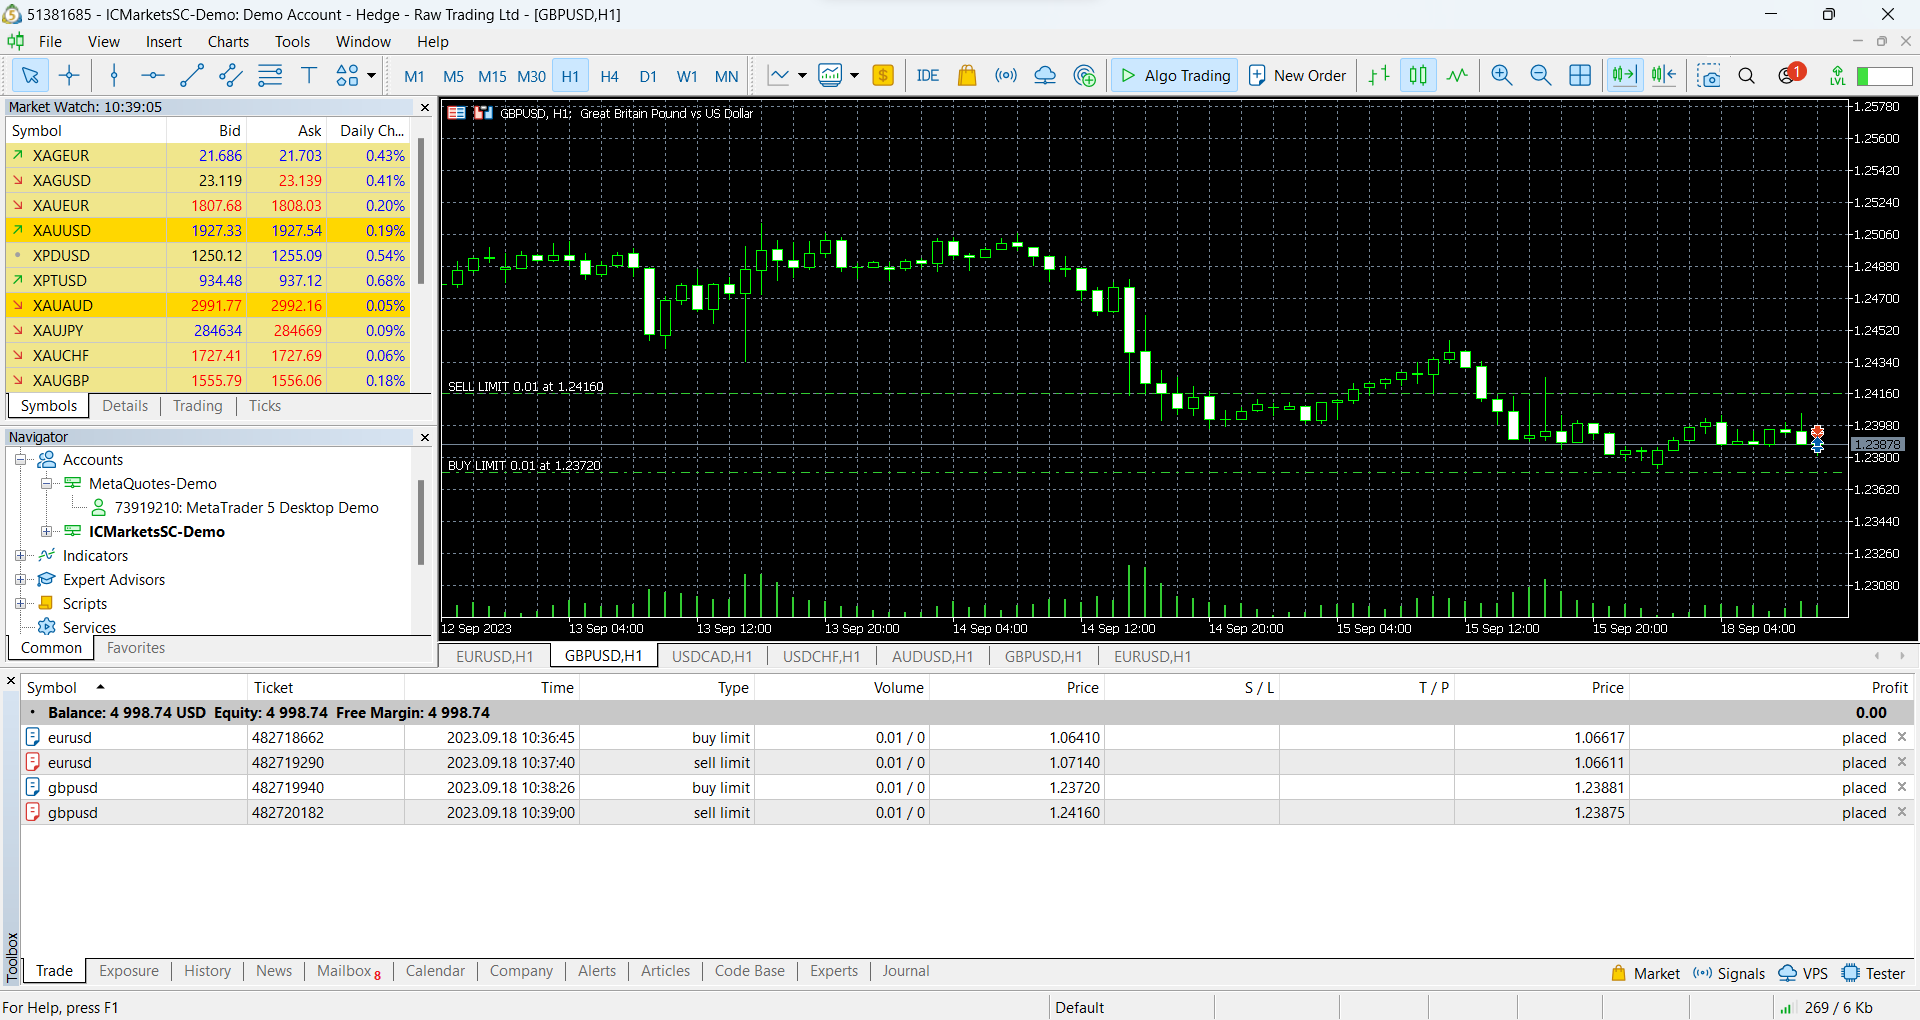

In [33]:
## function to delete pending orders
def delete_pending(ticket):
    close_request = {
        "action": mt5.TRADE_ACTION_REMOVE,
        "order": ticket,
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    }
    result = mt5.order_send(close_request)

    if result.retcode != mt5.TRADE_RETCODE_DONE:
        result_dict = result._asdict()
        print(result_dict)
    else:
        print('Delete complete...')

In [34]:
## function to close limit orders
def close_limit(symbol):
    orders = mt5.orders_get(symbol = symbol)
    df = pd.DataFrame(list(orders), columns = orders[0]._asdict().keys())
    df.drop(['time_done', 'time_done_msc', 'position_id', 'position_by_id', 'reason', 'volume_initial', 'price_stoplimit'], axis = 1, inplace = True)
    df['time_setup'] = pd.to_datetime(df['time_setup'], unit = 's')
    for ticket in df.ticket:
        delete_pending(ticket)

In [35]:
## closing all limit orders for EUR/USD
close_limit("EURUSD")

Delete complete...
Delete complete...


In [36]:
## closing all limit orders for GBP/USD
close_limit("GBPUSD")

Delete complete...
Delete complete...
